# Problem Statement

**Problem Statemnt : FindDefault (Prediction of Credit Card Fraud)**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Missing Value Treatment](#null)**
    - 2.4 - **[Duplicate Value Treatment](#null)**
    - 2.5 - **[Encoding and Feature Scaling](#enc)**
    - 2.6 - **[Data Type of 'Time'](#enc)**
3. **[What is Naive Bayes](#lr)**
    - 3.1 - **[Understanding Naive Bayes with an Example](#gi)**
4. **[Splitting the data into Train and Test](#sd)**
5. **[Creating the model on training dataset](#model)**
6. **[Run the model on the Test Dataset](#test)**
7. **[Check the accuracy of the model](#acc)**
    - 7.1 - **[Accuracy Score](#accscore)**
    - 7.2 - **[Confusion Matrix](#cm)**
    - 7.3 - **[ROC Curve](#roc)**
    - 7.4 - **[F1 Score](#f1score)**
    - 7.5 - **[Log Loss](#logloss)**
8. **[Comparing the Training and Testing Accuracies](#overunder)**
9. **[Applying K-Fold Cross Validation to find the best value of Laplace Smoothing](#kfcv)**
10. **[Model Deployment Phase](#kfcv)**

<a id="lib"></a>
# 1. Import Libraries

Importing the libraries which will be helpful for the data analysis.

Import several Python libraries and machine learning-related modules :

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

<a id="prep"></a>
# 2. Data Preparation

In [34]:
dataset=pd.read_csv('/content/drive/MyDrive/Data Scientist Course/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**We are successfully read our creditcard.csv file and able to fetch 5 rows output.**

<a id="read"></a>
# 2.1. Understand the Data

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


#The info command will help us to understand the different columns present in the dataset and its datatype
#The dataset consist of 31 columns which consist of float64, int64 datatype and having 284807 rows of data.

In [36]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

284807

In [37]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [38]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

31

<a id="eda"></a>
# 2.2. Exploratory Data Analysis

<Axes: ylabel='count'>

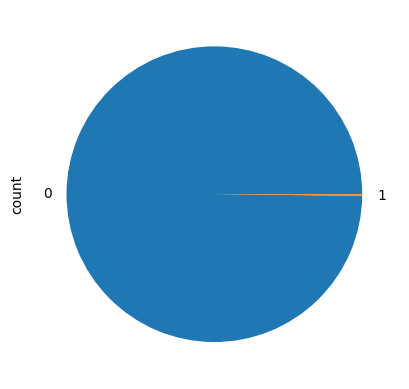

In [39]:
dataset['Class'].value_counts().plot(kind='pie')

<a id="null"></a>
# 2.3. Missing Value Treatment

In [40]:
dataset.isnull().sum()/len(dataset)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

**There are no missing values in the dataset, hence we are not going to do the missing value imputation in the dataset**

In [41]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<a id="null"></a>
# 2.4. Duplicate Value Treatment

In [42]:
dataset.duplicated().sum()
dataset.drop_duplicates(keep=False,inplace=True)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**As we found there are total 1854 duplicates value available in dataset. After doing missing vakur treatment dataset left with 284806**

<a id="enc"></a>
# 2.5. Encoding and Feature Scaling

In [43]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)


In [44]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996992,-0.705810,-0.040119,1.684260,0.978397,-0.248471,0.348444,0.193431,0.085852,0.334939,...,-0.024950,0.383381,-0.177832,0.109901,0.247288,-0.393113,0.334227,-0.066599,0.243788,0
1,-1.996992,0.608812,0.166081,0.108746,0.320386,0.041243,-0.060532,-0.066861,0.074264,-0.231045,...,-0.312660,-0.882128,0.162025,-0.561789,0.321408,0.260602,-0.030201,0.042737,-0.342602,0
2,-1.996971,-0.705062,-0.811171,1.176918,0.272009,-0.368387,1.353046,0.644577,0.212817,-1.382030,...,0.344353,1.065274,1.458984,-1.138797,-0.627966,-0.289314,-0.148752,-0.184863,1.157874,0
3,-1.996971,-0.503060,-0.108528,1.190071,-0.607510,-0.009906,0.937653,0.191805,0.323404,-1.265371,...,-0.149750,0.007027,-0.305978,-1.941795,1.242757,-0.461210,0.153126,0.185555,0.139544,0
4,-1.996949,-0.601959,0.538158,1.027673,0.288462,-0.298563,0.073316,0.482287,-0.228822,0.749869,...,-0.012641,1.102002,-0.221139,0.232654,-0.394595,1.041713,0.553750,0.655252,-0.074011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642175,-6.126411,6.131648,-6.540209,-1.458934,-3.904026,-1.955810,-4.023063,6.227650,1.752286,...,0.296448,0.154206,1.627607,-0.841681,2.757402,0.518220,2.405344,2.515080,-0.350264,0
284803,1.642196,-0.382769,-0.029350,1.350979,-0.519278,0.629061,0.795919,0.017450,0.253037,0.536953,...,0.297490,1.276127,0.019470,-1.678667,-1.163236,-0.820901,0.167825,-0.165841,-0.254402,0
284804,1.642217,0.983729,-0.179118,-2.162330,-0.391383,1.910784,2.277053,-0.245094,0.605480,0.397703,...,0.322230,0.798159,-0.060717,1.056413,0.510539,-0.181971,0.004155,-0.083431,-0.082432,0
284805,1.642217,-0.129110,0.326895,0.465105,0.491359,-0.277302,0.469557,-0.563389,0.580533,0.360806,...,0.368270,1.104446,-0.262609,0.202830,-1.091353,1.133803,0.270981,0.317194,-0.313428,0


<a id="enc"></a>
# 2.6. Time Correct Datatype

In [ ]:
# dataset['Time'] = pd.to_datetime(df['Time'], unit='s')

<a id="enc"></a>
# 2.7. Outlier Treatment

In [45]:
# outlier Treatment
def outlier_treatment(dataframe):
  Q1=dataframe.quantile(0.25)
  Q3=dataframe.quantile(0.75)
  IQR=Q3-Q1
  df_out=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]
  return df_out

df=outlier_treatment(dataset)

<a id="lr"></a>
# 3. What is Naive Bayes

Naive Bayes is one of the very simple and fastest Machine Learning models used for Classification. In this model machine will try to find the priors and likelihoods and based on that it generates the inbuild table which will later help to find the probabilty of the new data point. This algorithm is based on the Bayes Theorem of conditional probability.

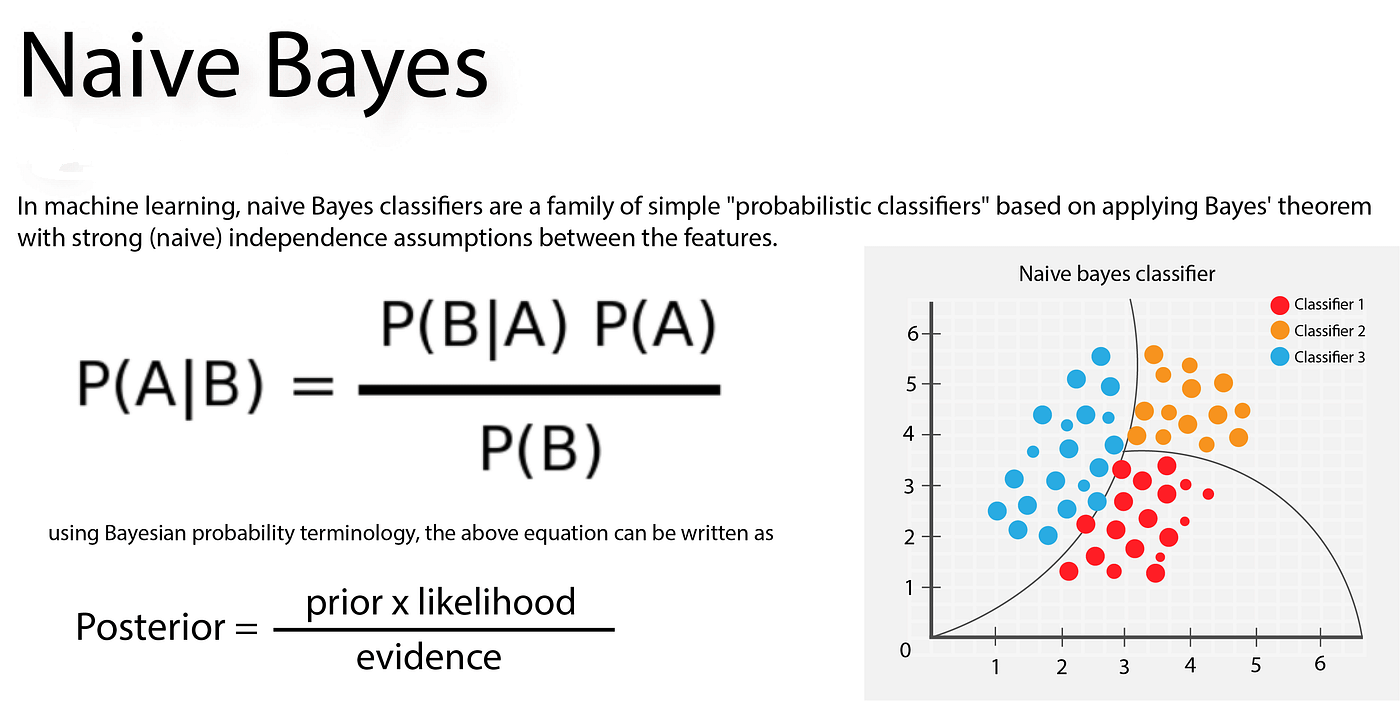

<a id="gi"></a>
# 3.1. Understanding Naive Bayes with an Example
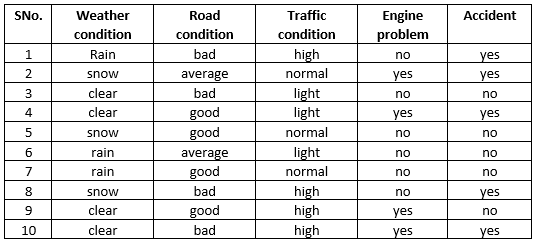

<a id="sd"></a>
# 4. Splitting the data into Train and Test

In [46]:
#Splitting all the independent variables in one array
x = dataset.iloc[:,0:29].values

In [47]:
#Splitting the dependent variable in one array
y = dataset.iloc[:,30].values

In [48]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

<a id="model"></a>
# 5. Creating the model on training dataset

In [49]:
#Applying the naive bayes on the training dataset
from sklearn.naive_bayes import GaussianNB
nbmodel_ini = GaussianNB()
nbmodel_ini.fit(x_train,y_train)

GaussianNB()

<a id="test"></a>
# 6. Run the model on the Test Dataset

In [50]:
y_pred_ini = nbmodel_ini.predict(x_test)

<a id="acc"></a>
# 7. Check the accuracy of the model

Now we will check accuracy for our model


<a id="accscore"></a>
# 7.1. Accuracy Score

In [51]:
#Using accuracy score we are checking the accuracy on the testing dataset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_ini)

0.978488796739156

**The acuracy of testinng dataset model is 0.9784**

<a id="cm"></a>
# 7.2. Confusion Matrix

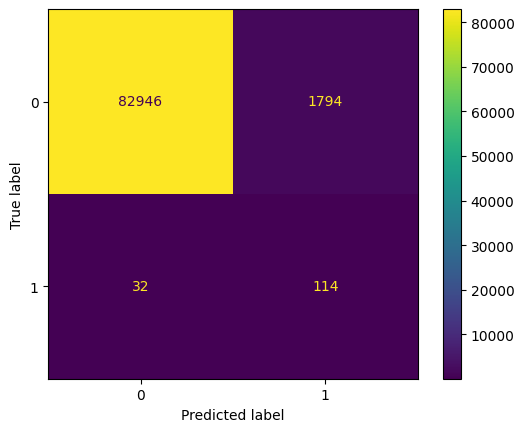

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Predict labels for the test data
y_pred = nbmodel_ini.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(cm).plot()

<a id="roc"></a>
# 7.3. RO Curve

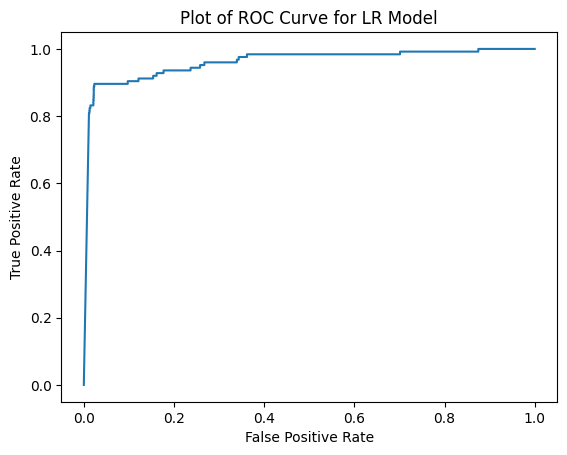

In [ ]:
#Importing all the functions to for checking the accuracies

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_pred_proba = nbmodel_ini.predict_proba(x_test)[:, 1]  # Assuming binary classification

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.title("Plot of ROC Curve for LR Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

<a id="f1score"></a>
# 7.4. F1 Score

In [ ]:
from sklearn.metrics import classification_report
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,nbmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      0.98      0.99     84761
 Positive(1)       0.05      0.85      0.10       125

    accuracy                           0.98     84886
   macro avg       0.53      0.91      0.55     84886
weighted avg       1.00      0.98      0.99     84886



<a id="logloss"></a>
# 7.5. Log Loss

In [ ]:
#Using Logloss we are checking the accuracy on the testing dataset
from sklearn.metrics import log_loss
log_loss(y_test,nbmodel_ini.predict(x_test))

0.7829853786199379

<a id="overunder"></a>
# 8. Comparing the Training and Testing Accuracies

In [ ]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = nbmodel_ini.predict(x_train)

In [ ]:
#Checking the accuracy of training dataset
accuracy_score(y_train,y_pred_train)

0.9779064659938304

In [ ]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.9782767476380086

**Conclusion:** As We observed there is very less difference between the accuracy of training and testing dataset, So we are good to go with the model.

<a id="kfcv"></a>
# 9. Applying K-Fold Cross Validation to find the best value of Laplace Smoothing

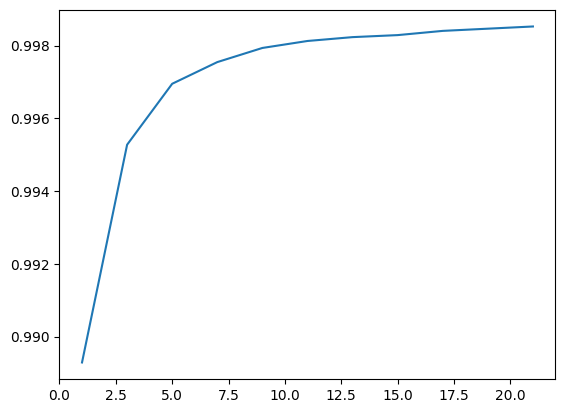

In [ ]:
#Using K-fold cross validation technique we will find the best value of laplace smoothing
var_smoothing = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for v in var_smoothing:
    nbmodel = GaussianNB(var_smoothing=v)
    scores = cross_val_score(nbmodel, x_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())

cv_score
plt.plot(var_smoothing, cv_score)
plt.show()

In [ ]:
#Applying the Naive Bayes on the training dataset
from sklearn.naive_bayes import GaussianNB
nbmodel_tuned = GaussianNB(var_smoothing=1)
nbmodel_tuned.fit(x_train,y_train)

GaussianNB(var_smoothing=1)

In [ ]:
#Running the model on the test dataset
y_pred_tuned = nbmodel_tuned.predict(x_test)

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.9889970077515727

In [ ]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = pd.concat([score_card, pd.DataFrame({'model_name': [model_name],
                                    'Accuracy Score' : [accuracy_score(y_test, y_pred)],
                                    'Precision Score': [precision_score(y_test, y_pred)],
                                    'Recall Score': [recall_score(y_test, y_pred)],
                                    'AUC Score': [roc_auc_score(y_test, y_pred)],
                                    'f1 Score': [f1_score(y_test, y_pred)]})], ignore_index=True) # Use pd.concat to append a new DataFrame

In [ ]:
update_score_card(y_test,y_pred_ini,'initial_model')

In [ ]:
update_score_card(y_test,y_pred_tuned,'tuned_model')

In [ ]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.978277,0.054894,0.848,0.913234,0.103113
1,tuned_model,0.988997,0.100691,0.816,0.902626,0.179262


**Interpretation - Overall there was a decent increase in the model accuracy after introducting the hyper parameter tuning technique and improve the value of laplace smoothing.**

<a id="kfcv"></a>
# 10. Model Deployment Phase

This is ending phase of project for deployment we will deploy model with same Naive Bayes model also. But to check with another model also we will use Random Forest Classifier model and able to deploy our model.

In [ ]:

# Define the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train,y_train)


import joblib
joblib.dump(model, 'credit_card_fraud_detection_model.joblib')



['credit_card_fraud_detection_model.joblib']